In [1]:
# import libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)


import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
sns.set_style("whitegrid")
color = sns.color_palette()


In [2]:
# read the data

df= pd.read_excel("ADSK_DATA/autodesk_2_project_data.xlsx", sheetname=0)
df.head()

,order_source,order_number,order_date,order_type,fiscal_quarter_and_year,promo_type,promo_type_code,bmt_product_group,bmt_offer_type_summary,bmt_offer_type_group,...,dap_days_used_in_last_7_days,dap_pings_in_last_7_days,dap_days_used_in_previous_one_month,dap_pings_in_previous_one_month,dap_days_used_in_previous_second_month,dap_pings_in_previous_second_month,dap_days_used_in_previous_third_month,dap_pings_in_previous_third_month,dap_days_used_in_previous_fourth_month,dap_pings_in_previous_fourth_month
0,BIC,128142,2016-08-08,New Acquisition,2017 Q3,NAMER GFP FY17Q3 Legacy trade in 3Y 50% off Gr...,UNKNOWN,LT Family,Product Subs,Product Subs New,...,0,0,10,17,14,22,6,7,14,23
1,BIC,128180,2016-08-08,New Acquisition,2017 Q3,NAMER GFP FY17Q3 Legacy trade in 3Y 50% off Gr...,UNKNOWN,Other,Product Subs,Product Subs New,...,0,0,19,38,14,23,17,75,10,15
2,BIC,128185,2016-08-08,New Acquisition,2017 Q3,NAMER GFP FY17Q3 Legacy trade in 3Y 50% off Gr...,UNKNOWN,ACAD Family,Product Subs,Product Subs New,...,0,0,3,4,0,0,0,0,0,0
3,BIC,128231,2016-08-08,New Acquisition,2017 Q3,NAMER GFP FY17Q3 Legacy trade in 3Y 50% off Gr...,UNKNOWN,LT Family,Product Subs,Product Subs New,...,0,0,17,33,10,17,18,51,15,28
4,BIC,128860,2016-08-09,New Acquisition,2017 Q3,NAMER GFP FY17Q3 Legacy trade in 3Y 50% off Gr...,UNKNOWN,Other,Product Subs,Product Subs New,...,0,0,0,0,0,0,6,9,1,1


In [3]:
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
order_source,BIC,BIC,BIC,BIC,BIC,BIC,BIC,BIC,BIC,BIC
order_number,128142,128180,128185,128231,128860,128873,128939,129036,129038,129054
order_date,2016-08-08,2016-08-08,2016-08-08,2016-08-08,2016-08-09,2016-08-09,2016-08-09,2016-08-09,2016-08-09,2016-08-09
order_type,New Acquisition,New Acquisition,New Acquisition,New Acquisition,New Acquisition,New Acquisition,New Acquisition,New Acquisition,New Acquisition,New Acquisition
fiscal_quarter_and_year,2017 Q3,2017 Q3,2017 Q3,2017 Q3,2017 Q3,2017 Q3,2017 Q3,2017 Q3,2017 Q3,2017 Q3
promo_type,NAMER GFP FY17Q3 Legacy trade in 3Y 50% off Gr...,NAMER GFP FY17Q3 Legacy trade in 3Y 50% off Gr...,NAMER GFP FY17Q3 Legacy trade in 3Y 50% off Gr...,NAMER GFP FY17Q3 Legacy trade in 3Y 50% off Gr...,NAMER GFP FY17Q3 Legacy trade in 3Y 50% off Gr...,NAMER GFP FY17Q3 Legacy trade in 3Y 50% off Gr...,NAMER GFP FY17Q3 Legacy trade in 3Y 50% off Gr...,NAMER GFP FY17Q3 Legacy trade in 3Y 50% off Gr...,NAMER GFP FY17Q3 Legacy trade in 3Y 50% off Gr...,NAMER GFP FY17Q3 Legacy trade in 3Y 50% off Gr...
promo_type_code,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
bmt_product_group,LT Family,Other,ACAD Family,LT Family,Other,ACAD Family,LT Family,ACAD Family,LT Family,LT Family
bmt_offer_type_summary,Product Subs,Product Subs,Product Subs,Product Subs,Product Subs,Product Subs,Product Subs,Product Subs,Product Subs,Product Subs
bmt_offer_type_group,Product Subs New,Product Subs New,Product Subs New,Product Subs New,Product Subs New,Product Subs New,Product Subs New,Product Subs New,Product Subs New,Product Subs New


In [4]:
# dataset size

df.shape

(55107, 137)

In [5]:
# description of each column

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
order_number,55107.0,6.485016e+09,1.938115e+09,3.126700e+04,7.055900e+09,7.056354e+09,7.056838e+09,7.450245e+09
srp_billed_usd,55107.0,7.311106e+03,2.281982e+04,-4.854610e+05,1.086000e+03,2.912000e+03,7.484000e+03,1.524727e+06
total_billed_usd,55107.0,2.839279e+03,8.921790e+03,-2.174860e+05,4.370000e+02,1.219000e+03,2.927000e+03,7.110140e+05
total_billed_net_p4p_incentives_usd,55107.0,2.833850e+03,8.916312e+03,-2.174860e+05,4.290000e+02,1.218000e+03,2.920500e+03,7.110140e+05
srp_billed_ccf,55107.0,7.416443e+03,2.301612e+04,-4.854610e+05,1.145000e+03,2.915000e+03,7.550000e+03,1.596698e+06
total_billed_ccf,55107.0,2.883689e+03,9.037052e+03,-2.174860e+05,4.440000e+02,1.253000e+03,3.031000e+03,7.445760e+05
total_billed_net_p4p_ccf_incentives,55107.0,2.878235e+03,9.031660e+03,-2.174860e+05,4.380000e+02,1.241000e+03,3.031000e+03,7.445760e+05
sf_subscription_seats_billed,55107.0,2.383726e+00,5.910282e+00,-7.600000e+01,1.000000e+00,1.000000e+00,2.000000e+00,3.400000e+02
channel_partner_csn,52992.0,3.742188e+09,2.226376e+09,7.000005e+07,7.019639e+07,5.070265e+09,5.105797e+09,5.133735e+09
channel_partner_duns,39671.0,5.334726e+08,2.941032e+08,1.109537e+06,3.317864e+08,6.506365e+08,7.045346e+08,9.871105e+08


In [6]:
# columns with NaN summary

df.isnull().sum()

order_source                                   0
order_number                                   0
order_date                                     0
order_type                                     0
fiscal_quarter_and_year                        0
promo_type                                     0
promo_type_code                                0
bmt_product_group                              0
bmt_offer_type_summary                         0
bmt_offer_type_group                           0
bmt_market                                     0
bmt_channel                                    0
bmt_billing_term                               0
bmt_offer_type_subgroup                        0
srp_billed_usd                                 0
total_billed_usd                               0
total_billed_net_p4p_incentives_usd            0
srp_billed_ccf                                 0
total_billed_ccf                               0
total_billed_net_p4p_ccf_incentives            0
sf_subscription_seat

### Data Cleaning

In [7]:
# Drop 13 columns missing >50000 rows

df= df.dropna(axis=1,thresh=5200)
df.shape

(55107, 123)

In [8]:
# columns with NaN
df_na = pd.DataFrame(df.isnull().sum())
df_na[(df_na >0).any(1)]

,0
agreement_number,2303
agreement_status,2303
agreement_start_date,2303
agreement_end_date,2305
contract_term,2305
billing_behavior,2305
deployment,2335
channel_partner_csn,2115
channel_partner_uuid,2138
channel_partner_duns,15436


In [9]:
# Drop contract_term, use bmt_billing_term

df.drop(["contract_term"], axis=1,inplace=True)

df["bmt_billing_term"].value_counts()

3 Year    44959
1 Year     9736
2 Year      412
Name: bmt_billing_term, dtype: int64

In [10]:
# Fill missing agreement_start_date with order_date

df["agreement_start_date"] = df["agreement_start_date"].fillna(df["order_date"])
df['agreement_start_date'] = pd.to_datetime(df['agreement_start_date'])

# Fill missing agreement_end_date with order_date + billingterm
from datetime import timedelta

df["agreement_end_date"][df["bmt_billing_term"] =="1 Year"] = df["agreement_end_date"][df["bmt_billing_term"] =="1 Year"].fillna(df["agreement_start_date"]+timedelta(days=365))
df["agreement_end_date"][df["bmt_billing_term"] =="2 Year"] = df["agreement_end_date"][df["bmt_billing_term"] =="2 Year"].fillna(df["agreement_start_date"]+timedelta(days=730))
df["agreement_end_date"][df["bmt_billing_term"] =="3 Year"] = df["agreement_end_date"][df["bmt_billing_term"] =="3 Year"].fillna(df["agreement_start_date"]+timedelta(days=1095))

#convert to datetime (year 3333-12-31 to 2099-12-31)
df['agreement_end_date'] = df['agreement_end_date'].apply(lambda x: "2099-12-31" if x == "3333-12-31" else x)
df['agreement_end_date'] = pd.to_datetime(df['agreement_end_date'])


C:\Users\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [11]:
# Fill uuid_age with order_date

df["uuid_age"] = df["uuid_age"].fillna(df["order_date"])

In [14]:
# Fill numerical NaN with mean within 1 stdv

mncol = ["uuid_seats_on_active_subs","readiness_score","parent_owner_uuid_count",
         "onboarding_score","onboarding_access_score","onboarding_product_utilization_score",
         "onboarding_support_score"]
for i in mncol:
    avg = df[i].mean()
    std = df[i].std()
    count = df[i].isnull().sum()
    
    fill = np.random.randint(avg - std, avg + std, size = count)
    df[i][np.isnan(df[i])]= fill
    df[i]=df[i].astype(int)

C:\Users\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [16]:
# Fill NaN data id with 0

zerocol = ["agreement_number","channel_partner_csn","channel_partner_uuid",
           "channel_partner_duns","owner_account_csn","owner_account_uuid",
           "owner_account_duns","parent_account_csn","parent_account_uuid",
           "parent_account_duns"]

for i in zerocol:
    df[i]=df[i].fillna(0)


In [17]:
# Fill NaN categorical data with Unknown

nkcol= ["agreement_status","billing_behavior","deployment","channel_partner_type",
     "owner_type","self_parented","account_type_name","named_account_flg",
     "parent_named_account_flg","geo_cd","country_name","country_code",
     "hier_industry_segment_name","hier_industry_group_name","customer_size_code",
     "onboarding_health","access_health","product_utilization_health",
     "support_health","current_segment","segment_minus_1","segment_minus_2",
     "segment_minus_3","segment_minus_4","segment_minus_5"]

for i in nkcol:
    df[i]=df[i].fillna("Unknown")

In [18]:
# columns with NaN
df_na = pd.DataFrame(df.isnull().sum())
df_na[(df_na >0).any(1)]

,0


In [19]:
# Export to CSV

df.to_csv('Adsk_dataset_clean.csv', index=False)

### End of Cleaning

In [18]:
df["order_source"].value_counts()

SAP    50590
BIC     4517
Name: order_source, dtype: int64

In [19]:
df["order_type"].value_counts()

GOR                48931
New Acquisition     4517
RE                   996
G2                   299
L2                   195
ZOLT                 169
Name: order_type, dtype: int64

In [20]:
df["fiscal_quarter_and_year"].value_counts()

2017 Q3    17361
2018 Q3    12601
2018 Q1    11800
2017 Q1    11096
2018 Q2     1327
2017 Q4      661
2017 Q2      172
2018 Q4       89
Name: fiscal_quarter_and_year, dtype: int64

In [21]:
df["promo_type"].value_counts()

FY17 Q3 GLOBAL FIELD PROMOTION                                     16049
Q1 FY18 Global Field Promo                                         10798
FY17 Q1 GFP WW TRADE IN 3 YEAR                                     10389
Q2FY18 AMER & EMEA Q3 GFP non IC Q2start                            8527
Q2FY18 AMER & EMEA Q3 GFP IC Early Start                            3959
NAMER FY18 Q3 GFP Everything 1 & 3 year 20%                          890
GFP FY17Q1 LEGACY - 70% off                                          711
FY17 Q4 Japan Trade In Promotion                                     692
EMEA FY17 GFP Legacy 50% with trade in Aug 16 - Oct 20 3Y term       613
NAMER GFP FY17Q3 Legacy trade in 3Y 50% off Group 1                  542
EMEA FY18 Q1 GFP (Legacy) Promo 30% off 3Y, LT 1YR                   501
NAMER/CANADA FY18 Q1 GFP (Legacy) Promo 30% off 3Y                   456
EU, DE, FR and UK FY18 Q3 GFP Everything 1 & 3 year 20%              277
EMEA FY17 GFP Legacy 50% with trade in Aug 16 - Oct

In [22]:
df["bmt_product_group"].value_counts()

LT Family      27194
IC/Suites      11833
ACAD Family     9376
Other           6704
Name: bmt_product_group, dtype: int64

In [23]:
df["bmt_market"].value_counts()

Mature      41231
Emerging    13875
Other           1
Name: bmt_market, dtype: int64

In [24]:
df["bmt_channel"].value_counts()

Indirect    48242
eStore       6507
Direct        358
Name: bmt_channel, dtype: int64

In [25]:
df["channel_partner_csn"].nunique()

410

In [26]:
df["bmt_billing_term"].value_counts()

3 Year    44959
1 Year     9736
2 Year      412
Name: bmt_billing_term, dtype: int64

In [27]:
df["bmt_offer_type_subgroup"].value_counts()

Product Subs New SU    49603
Product Subs New MU     5504
Name: bmt_offer_type_subgroup, dtype: int64

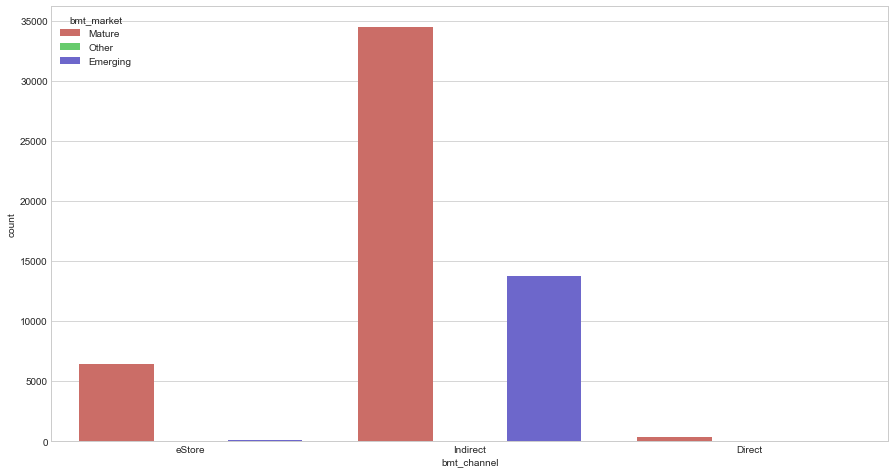

In [28]:
fig, axis1 = plt.subplots(1,1,figsize=(15,8))
sns.countplot(x="bmt_channel",hue="bmt_market", palette="hls", data=df, ax=axis1)